# Final Assignment RO47002 - Machine Learning for Robotics 2025/2026

Before you start, fill in the cell below your lab group's number and the names of both lab partners.
It is also suggested that you carefully read through all provided content before you start adding things.

*Note*: as always, basic plagiarism and ethical guidelines apply:
* By submitting this notebook, **you both claim that the solution is yours and yours only.**
* You are not allowed to share your work with others.
* Even after the deadline has passed, do *not* share or upload your solution anywhere (e.g. do not put it on github).

In [1]:
GROUP_NUMBER = "20"
STUDENT_NAME1 = "Samuel Leveau"
STUDENT_NUMBER1 = "6374670"
STUDENT_NAME2 = "Hunor Adam Kovacs"
STUDENT_NUMBER2 = "6549608"

In [2]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

<div class="alert alert-block alert-warning">
As this final assignment serves as a demonstration of what you have learned during this course, entirely relying on generative AI models (e.g., ChatGPT) for this assignment is highly discouraged. That said, we would rather have you be transparent about the use of such generative AI models; hence, we provide the text block below. If you used an AI model for anything that ended up in this notebook, you should state what you used for which assignment(s) and why. If someone suspects the use of AI models during the grading of the assignment without this being stated in this section, it could lead to your final assignment being invalidated.
</div>

## **Adjust this section to whatever you feel makes sense. See below two examples of what to write here**

We, *Sam Leveau* & *Hunor Kovacs* from group *20*, want to clarify our use of generative AI models for this final assignment.

We have used *some generative AI* for the following:
- Creating the feature extractor. Namely, using ChatGPT to help with using OpenCV functions and the build_feature_matrix function.
- How to find the unique values and their counts of an array: np.unique(array, return_counts=True)
- Recommended to use a GlobalAveragePooling2D() layer to improve training time in the CNN model of task 3.1
- How to incorporate Batch Normalization in the CNN model of task 4.
  
Apart from these examples, we claim that all other work is our own.

---

## Introduction
The year is **2147**. The idea of *"space, the final frontier"* is old news, and humans have traveled all across the galaxy for decades. However, in this era of discovery, we also encountered multiple planets and moons with lots of hazardous materials, making human exploration impossible. That said, many of these locations contain incredibly valuable resources, presenting a golden opportunity for the capitalist association of Earth.

Your employer is responsible for harvesting a valuable yellow material. The idea is to send a robot to each planet or moon where this material is sighted. Given the distance from Earth, the ability to remotely control or update the robot software is unclear. Therefore, your employer mandates that the robots get trained to the best of the company's capabilities before being sent on their journey. Based on the area footage your employer has access to, expert environmental artists have painstakingly created representations of the intergalactic locations (very inventively called **'Room 0'**, **'Room 1'**, and **'Room 2'**). Someone even took the time to conjure up a worst-case testing case (**'Room 3'**) to validate the robotic system.

As this assignment is of the utmost importance to the company, you, the company intern, are assigned to take the lead. To ease you into the project, you will first complete a familiarization assignment to train a model solely for Room 1, before moving on to designing a more general AI.

## Robot AI

In this task, the robot's actions need to be determined based on only the robot's last observation (i.e. sensor measurements). More technically: the goal is to create a function $policy(observation) \rightarrow action$, which the robot can continuously apply in a loop on its sensor measurements to determine its next action. This type of function is often called a *policy*.

In this assignment, the input and output of the policy function `policy` are defined as:
- the input `observation` will be an RGB image (a numpy array) containing a view of the robot's surroundings.
- the output `action` should be an integer out of one of the possible actions (an integer between 0 and 2):

    0. Turn left
    1. Turn right
    2. Move forward

[comment]:<> (More details will be provided later in the section 0. Code to get you started" below.)

Note that the policy function will completely determine the behavior of the robot.
You can think of the robot executing the policy in a never-ending loop (in pseudo-code):
```python
# Pseudo robot main loop with policy f
while True:
    observation = read_sensor_measurement()
    action = policy(observation) # apply the policy
    execute_action(action)
```
In fact, the behavior is already implemented for you in a **simulator**. This means you can test a policy function `policy` by plugging it in the simulator and seeing how your robot behaves!
The simulator also allows us to quantify how well your robot behaved by returning a 'reward' value for each simulation step (a higher reward is better). More details on the rewards will be explained below in Section 0.

## Task description: imitation learning

These type of tasks, where a robot's policy needs to be optimized to achieve a high expected reward for operating in some environment, is often addressed through *reinforcement learning*. However, in this assignment we will *not* use reinforcement learning techniques, but mainly treat the problem as a **supervised classification task**.
The training input (observations) and output (action labels) data will be obtained through demonstrations of humans *manually* controlling the robot. By training your machine learning models on these demonstrations, you will create an AI which "imitates" how a human would control the robot. This type of supervised machine learning is therefore called *imitation learning*.

There are some coding challenges and design choices that you have to solve to use human demonstrations as labeled data to create your machine learning models. As before, you will have to think about feature extraction, hyperparemeter optimization, evaluation metrics, comparing models, etc.

Once you have trained a classification model, you could define a new policy function which uses your trained model, and test this policy in the simulator. Does your most successful model also accumulate the most reward in the simulation? Can you make an AI which successfully operates in seen and unseen rooms?

## Deliverables
The deadline is **Monday, October 27th, 2025 at 23:59**. Late submission is –1 grade point per day.

* The main deliverable is this Jupyter Notebook, integrating the report (markdown cells) and the code.
* Submission is again in the form of a single ZIP file that *includes your notebook, and all files required to run the notebook and reproduce the results*. This includes all used data/demonstrations (including the ones that were provided), any loadable parameter files, any auxiliary scripts, etc.
* Name the ZIP file "**GroupNumber_final_assignment.zip**", e.g., if you are in group 456, the name would be "456_final_assignment.zip".
* Unlike previous lab assignments, there are no autograded cells or asserts, but we will grade the notebook manually. Therefore, you are free to add cells as you see fit, as long as the required sections are still present in the notebook.
* Make sure that the notebook runs correctly. That is, clear all outputs, restart the kernel and run the notebook from top to bottom. 
* The notebook needs to be able to run within 20 minutes on a high-end PC, performing all steps (also including training, the only exception is hyperparameter optimization which can be commented out).
* In contrast to the practica, please submit the notebook *including* the output (i.e., do not clear the outputs before zipping it up). 


## Grading Criteria
Below you will find an outline of the sections that the notebook needs to contain and what we expect for each part. More specific requirements are listed there as well. The indicated number of points, out of a total of 100, should give you a rough indication of how much effort to put into each part.

<div class="alert alert-block alert-warning">
In general, we will not focus as much on the performance of the method you design, but rather the <b>level of understanding and argumentation about your design choices</b>. So, we are not only interested in WHAT you did, but will put a strong emphasis on your reasoning about the WHY. Try to synthesize rather than describing what you did step by step.
</div>

### Quality of the report (20 points)
- Structure & Readability
 - Logical flow
 - Connection between parts
- Academic English
 - Do not use short forms, so not "isn't" / "wouldn't" but "is not" / "would not".
 - Do not use colloquial style, like "a couple of".
 - Spell check and proofread your report.
- Level of detail
 - Strive for elegant, concise text - longer reports do not necessarily yield higher grades.
 - There is no need to re-explain theory. Assume that the target audience of the report has followed the course.
- Figures & Tables
 - Choose figures/plots/tables carefully. Only include those that add to the story of the report. Do not put the burden on the reviewer to figure out which results you are basing your conclusions on, but specifically refer (parts of) the specific table/plot/figure when needed.
 - When comparing two or more signals display them in one plot. Explain the colors / line types. The scale of the plots must be carefully chosen in order to clearly convey the information intended. Label the axes in graphs properly (variables and units).
- Citations
 - If you use images, theory and methods beyond what was covered in the course, etc., always reference sources.


### Your implementations and answers (80 points)

The remainder of this notebook follows the following structure:

0. Code to get you started (0 points, *nothing for you to do here*)
1. Explore & Inspect the Data (5 points)
2. Prepare the Data and Evaluate Features (15 points)
3. Single Room Action Classification  (35 points)
4. Enabling Generalization (20 points)
5. Present your solution (5 points)

Apart from section 0, you will have to implement and answer questions for all of the other 5 sections to earn points. *For each of these 5 sections, we have various questions or implementation tasks that your submission should address. These are listed in the cells at the end of this notebook.*

Note that there is not one best answer to these questions, and the task could be addressed in different ways. We want to know *your* motivation for *your* selected approach.

---

# 0. Code to get you started

Before you start working on this notebook, **you will first need to create the `RO47002_FA` conda environment**. Go to you final assignment folder and perform:

```
conda env create -f environment.yml
conda activate RO47002_FA
```

The following cell checks if the critical components comply with the versions given in the .yml environment file.

In [3]:
from packaging import version

import cv2
import miniworld
import tensorflow as tf

assert version.parse(tf.__version__) == version.parse("2.19.1"), f"Expected tensorflow 2.19.1, got {tf.__version__}"
assert version.parse(cv2.__version__) == version.parse("4.10.0"), f"Expected opencv 4.10.0, got {cv2.__version__}"
assert version.parse(miniworld.__version__) == version.parse("2.1.0"), f"Expected miniworld 2.1.0, got {miniworld.__version__}"

<div class="alert alert-block alert-info">
If you encounter "zmq message arrived on closed channel" errors when working on this notebook, ensure that you do not have AdBlockers, Firewalls or similar active. If this does not resolve the issue, contact us regarding your particular case.
</div>

Note, you will not have to implement anything in this section, but you are free to play around with what is provided here, or copy parts to new cells in your solutions.

## Global flags

Here we define two global flags that will influence if this notebook will show popup windows when running the simulation:
- `show_policy` defines whether you will see a pop-up window visualizing the policy from a random initial configuration
- `collect_demo` defines whether you will see an interactive window that allows you to collect your own demonstrations

Feel free to change the flags later if you need. For instance, if you want to test if your notebook runs properly and reproduces your results, but you do not want to wait for the popup windows, you can set these flags to False.

In [4]:
# Configure if the simulator should show pop-up windows
# CHANGE IF NEEDED
show_policy = False
collect_demo = False

## Load default modules

In [5]:
import pickle
import numpy as np

import matplotlib.pyplot as plt
 
import cv2 # you are allowed to use functions from cv2
import glob

# import the simulation environment
import pickup_objects_ro47002
from pickup_objects_ro47002 import PickupObjects


In [6]:
# creating environments for the 4 environments with rendering
envs = []
from pickup_objects_ro47002 import PickupObjects
for n in range(4): 
    envs.append(PickupObjects(room_id=n, max_episode_time_step=1000, rendering=True))
    
# N.B.: on some computer you might get a warning "Cannot change thread mode after it is set"
# when you run this cell the first time. It is safe to ignore this warning, the notebook should still work properly.

room_id: 0
room_id: 1
room_id: 2
room_id: 3


In [7]:
# creating environments for the 4 environments without rendering
envs_norender = []

from pickup_objects_ro47002 import PickupObjects
for n in range(4): 
    envs_norender.append(PickupObjects(room_id=n,max_episode_time_step=1000, rendering=False)) 

room_id: 0
room_id: 1
room_id: 2
room_id: 3


First, we explore the available environments. The code below generates an image from the 4 environments. The environments with room_id's 0, 1 and 2 are used as training data. The environment with room_id 3 is used solely for evaluation. Do **NOT** use room_id 3 for anything other than evaluation! You do not need to understand how this code works, but it should help you understand the context of what we are doing.

In [8]:
import ipywidgets
import pyglet
%matplotlib inline
# Show screenshot of a sampled environment
def plot_room_example(room_id):
    env = envs_norender[room_id]
    env.reset(seed=1)
    plt.imshow(env.render())
    env.render()
    plt.title(f'Room {room_id}')
    

ipywidgets.interactive(plot_room_example, room_id=(0,3), continuous_update=False)

interactive(children=(IntSlider(value=1, description='room_id', max=3), Output()), _dom_classes=('widget-inter…

## Loading pre-recorded human demonstrations

You are provided several pre-recorded demonstrations of a human *manually controlling* the robot on several runs in several environments.
**You can use this data to train a classifier that you can use to implement one or more better policies, which should (ideally) perform similar to how a human would control the robot.**

Each provided demonstration
* contains a sequence of (observation, action) pairs
* recorded with a specific room
* for convenience, also contains arrays containing the fixed room_id of these input/output pair

A demonstration is stored as a python pickle file.
The code below shows how to load the saved demonstrations, and to do some simple pre-processing.

In [9]:
# Look for all the demonstration pickle files in the demonstrations/ directory.
#  The originally provided demo files are called: demo-[room_id]-[datetime].pickle
#  Any demo files you record yourself are called: demostud-[room_id]-[datetime].pickle

# CHANGE THIS IF NEEDED: select the pickle file pattern to match ...

#DEMO_FILEPATTERN = 'demo-*-*.pickle'      # only use ORIGINALLY provided demo files
#DEMO_FILEPATTERN = 'demostud-*-*.pickle'  # only use YOUR own collected demo files
DEMO_FILEPATTERN = 'demo*-*.pickle'        # use ALL available demo files

# find the relevant filenames
filenames = glob.glob(f'demonstrations/{DEMO_FILEPATTERN}')
filenames.sort() # ensure the order is well-defined
print(f'Found {len(filenames)} demonstrations')

# in a loop, load the found pickle files
demonstrations = []
for filename in filenames:
    with open(filename, 'rb') as fd:
        demonstration = pickle.load(fd)
        
        actions = demonstration['actions']
        print(f'Loaded {actions.shape[0]} samples from {filename} ...')
        
        demonstrations.append(demonstration)

Found 66 demonstrations
Loaded 223 samples from demonstrations\demo-0-20251007_152629.pickle ...
Loaded 250 samples from demonstrations\demo-0-20251007_152704.pickle ...
Loaded 210 samples from demonstrations\demo-0-20251007_152732.pickle ...
Loaded 173 samples from demonstrations\demo-0-20251007_152752.pickle ...
Loaded 191 samples from demonstrations\demo-0-20251007_152817.pickle ...
Loaded 179 samples from demonstrations\demo-0-20251007_152841.pickle ...
Loaded 148 samples from demonstrations\demo-0-20251007_152901.pickle ...
Loaded 185 samples from demonstrations\demo-0-20251007_152923.pickle ...
Loaded 170 samples from demonstrations\demo-0-20251007_152945.pickle ...
Loaded 213 samples from demonstrations\demo-0-20251007_153015.pickle ...
Loaded 218 samples from demonstrations\demo-0-20251007_153042.pickle ...
Loaded 171 samples from demonstrations\demo-0-20251007_153103.pickle ...
Loaded 165 samples from demonstrations\demo-0-20251007_153124.pickle ...
Loaded 269 samples from dem

In [10]:
# we can combine all the observations, actions, and room_ids
observations = np.concatenate([d['observations'] for d in demonstrations])
actions = np.concatenate([d['actions'] for d in demonstrations])
room_ids = np.concatenate([d['time'] for d in demonstrations])

# pre-processing: subsample and only keep every n-th sample for efficiency
# this can speed up training
ss = 1
observations = observations[::ss]
actions = actions[::ss]
room_ids = room_ids[::ss]

## Understanding the data

We here take a closer look at format of the demonstration data. The observations (input) are RGB images. The actions (target class labels) are integers.

In [11]:
# count the total number of observations
N = observations.shape[0]

print(f'The data consists of {N} (observation, action) pairs:')
print(f'- observations : a {observations.shape} numpy int8 array, i-th entry contains RGB image of sample i')
print(f'- actions      : a {actions.shape} numpy int array, i-th entry contains action (class) label of sample i')
print(f'- room_ids     : a {room_ids.shape} numpy int array, i-th entry contains the room_id of sample i')

The data consists of 13132 (observation, action) pairs:
- observations : a (13132, 60, 80, 3) numpy int8 array, i-th entry contains RGB image of sample i
- actions      : a (13132,) numpy int array, i-th entry contains action (class) label of sample i
- room_ids     : a (13132,) numpy int array, i-th entry contains the room_id of sample i


We can inspect inspect a single sample in the recorded data:

Action of sample 34:                     0
room_id when sample 34 was recorded:     0


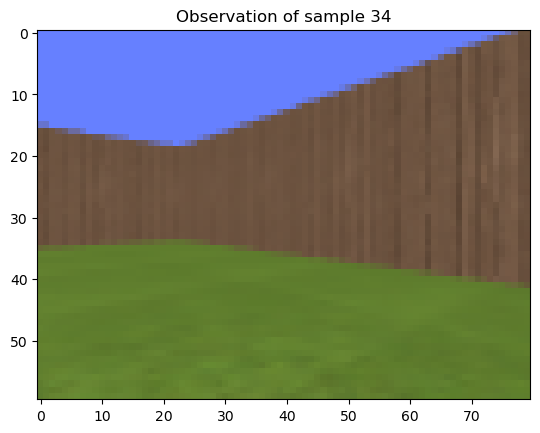

In [12]:
idx = 34 # sample index, should be in range [0, N-1]

print(f'Action of sample {idx}:                    ', actions[idx])
print(f'room_id when sample {idx} was recorded:    ', room_ids[idx])

plt.imshow(observations[idx])
plt.title(f'Observation of sample {idx}');

Note that the observation is just a low-resolution image of the simulated environment.

An action (label) is simply an integer. The three possible action values are:

In [13]:
ACTION_LEFT = 0  # Turn left
ACTION_RIGHT = 1 # Turn right
ACTION_FORWARD = 2  # Move forward

You can use the demonstration data to train and validate your machine learning methods.
Of course, you would first need to define some feature extraction procedure(s) to convert the observations into some suitable feature vectors for your machine learning techniques.

### Replay demonstrations

The following cell allows you to replay some of the demonstrations found in the dataset.

Study the demonstrations. 

 - Are you able to recognize a specific strategy employed by the human demonstrator to solve this environment? 
 - What would happen if different strategies were employed by the demonstrator? How does this relate to *irreducible error*?

If you were to collect demonstrations yourself, these are questions that you should take into account.

In [14]:
from matplotlib import animation
from IPython.display import HTML, display, clear_output
import ipywidgets


class ReplayDemos(animation.FuncAnimation):
    def __init__(self, demo_id):
        # np array with shape (frames, height, width, channels)
        self.video_init = np.array(complete_demonstrations[demo_id]['observations'])
        
        # Add black frames at the end of the video
        length_end = 20
        self.end_video = np.zeros(np.append(length_end, self.video_init.shape[1:]), dtype=np.int32)
        self.video = np.append(self.video_init, self.end_video, axis=0)
        
        # Create figure
        self.fig = plt.figure()
        self.im = plt.imshow(self.video[0,:,:,:])
        
        plt.title('Replaying demonstration %i' % demo_id)
        plt.close() # this is required to not display the generated image
        
        # Init parent
        super().__init__(self.fig, self.animate, init_func=self.init, frames=self.video.shape[0], interval=50)
        
    def init(self):
        self.im.set_data(self.video[0,:,:,:])

    def animate(self, i):
        self.im.set_data(self.video[i,:,:,:])
        return self.im


def filter_demos(demonstrations, thr=50):
    # Remove all short demonstrations
    complete_demonstrations = []
    for demo in demonstrations:
        if demo['observations'].shape[0] > thr:
            complete_demonstrations.append(demo)
            
    return complete_demonstrations

complete_demonstrations = filter_demos(demonstrations, thr=50)

def replay_function(demo_id):
    clear_output(wait=True)
    replay_demos = ReplayDemos(demo_id)
    display(HTML(replay_demos.to_html5_video()))

ipywidgets.interactive(replay_function, demo_id=(0,len(complete_demonstrations)-1), continuous_update=False)

interactive(children=(IntSlider(value=32, description='demo_id', max=65), Output()), _dom_classes=('widget-int…

## Testing your model in  the simulator


At some point, *after you have trained and evaluated your classifier*, you might want to check how well your classification method can actually control the robot. For this, you will need to wrap your trained classifier into a policy function that the simulator can use.

This section will go over the details of
* how to start the simulator;
* how to implement a policy `policy`;
* how to analyse the performance of a policy.


### Running a simulation

The function `run_simulation` below will setup a simulation of your robot on a given environment (`env`) and will use the policy `policy` you provide to control the robot, for a maximum of `max_steps` simulation steps. The previously created environments `env = PickupObjects(room_id, max_episode_time_step=1000, rendering=False)` determine the environment and whether the simulation is shown in a popup-window. The simulation function can also record all the (observation, actions) pairs (`record_data=True`).

The function signature of `run_simulation` is:
```python
rewards = run_simulation(policy, env, max_steps=500, verbose=1, record_data=False, delay=0.0, seed=-1, human_control=False)
    """ Run robot simulation
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of PickupObjects] the environment to simulate
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation
    - max_steps     # [int] the maximum number of steps N to run the simulation
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    - seed          # [int] location generation random seed - only set if >=0
    - verbose       # [int] how much text gets printed: 0 = none, 1 = final stats, 2 = all
    - human_control # [True/False] if true the key presses will be passed on the policy
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
    """ 
```


In [15]:
# user key input handler
from pyglet.window import key
import time

# keep track if which keys have been pressed in the popup window
# (will be used later for the human control)
KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False,}

# define the set of all actions    
ACTIONS = [0, 1, 2]
ACTION_NAMES = ['turn_left', 'turn_right', 'move_forward']
NUM_ACTIONS = 3 # number of distinct actions

def run_simulation(policy, env, max_steps=500, verbose=1, record_data=False, delay=0.0, seed=-1, human_control=False):
    """ Run robot simulation
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of PickupObjects] the environment to simulate
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation
    - max_steps     # [int] the maximum number of steps N to run the simulation
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    - seed          # [int] location generation random seed - only set if >=0
    - verbose       # [int] how much texts gets printed: 0 = none, 1 = final stats, 2 = all
    - human_control # [True/False] if true the key presses will be passed on the policy
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
    """
    
    if verbose > 0:
        print(f'Starting simulation for {max_steps} steps.')
        if env.rendering:
            print('*** Press ESC key in popup window to stop the simulation! ***')
        print()

    if seed>=0:
#         env.seed(seed)
        env.reset(seed=seed)
    else:
#         env.seed(int( time.time() * 1000.0 ))
        env.reset(seed=int( time.time() * 1000.0 ))

    rewards = [] # will store the accumulated rewards
    observations = [] # will store the accumulated observations (only if record_data==True)
    actions = [] # will store the accumulated actions outputted by policy f (only if record_data==True)

    completed_steps = 0   
    
    
    try:
        # reset the simulation, and get the initial observation (robot "sensor measurement")
        obs = env.reinit(2 * max_steps, wait_for_keypress=human_control)[0]
        
        # main simulation loop
        for step in range(max_steps):
            time.sleep(delay)
               
            if env.rendering:
                env.render()
            
            # get keyboard pressed button status from environment
            KEY_PRESSED.update(env.key_pressed)

            if env.stop_simulation: break
            
                
            # ** APPLYING YOUR POLICY **
            # execute the given policy on the observation to determine the robot's action
            action = policy(obs)
            
            # sanity check: is the policy implemented correctly?
            assert (isinstance(action, (int, np.integer))) # returned action should be a builtin or numpy integer
            assert (action in ACTIONS) # action should be an integer 0, 1, 2 or 3
            
            if verbose > 1:
                print(f'step {step}: action = {ACTION_NAMES[action]}')

            if record_data:
                # only store all the observation and action pairs during the simulation
                #   if the record_data argument is set to True
                observations.append(obs)
                actions.append(action)

            # execute simulation step with the given control input
            obs, reward, environment_done, truncation, info = env.step(action)
            completed_steps += 1
            
            if verbose > 1:
                print(f'step {step}: reward = {reward}')

            # collect all rewards in a list
            rewards.append(reward)

            # exit simulation when goal is reached
            if environment_done or truncation:
                break

    finally:
        if env.rendering:

            try:
                if getattr(env, "window", None):
                    env.window.remove_handlers()
            except Exception:
                pass

            try:
                if getattr(env, "window", None):
                    env.window.close()
            finally:
                env.window = None
        
    rewards = np.array(rewards)
    total_reward = np.sum(rewards)
    
    if verbose > 0:
        print(f'total reward after {completed_steps} steps: {total_reward}')
        print(f'average reward: {total_reward/completed_steps}')
    
    if record_data:
        return rewards, np.array(observations), np.array(actions, dtype=int), truncation
    
    # by default, only return the rewards
    return rewards

### Evaluating Policy Performance

To evaluate how effectively a policy performs, we use two key metrics: **reward** and **success rate**.

The policy is tested multiple times under different random seeds to ensure reliable results. In each run, the simulator returns the **rewards** collected by the robot at every step, reflecting how efficiently it picks up objects.

* The **average reward** is computed over all runs and represents the overall performance and efficiency of the policy.
* The **success rate** measures how often the robot successfully completes the task—reaching and picking the target object—across multiple trials. It is calculated as the number of successfully picked objects divided by the total number of objects.

In summary, the objective is to maximize both the success rate and the reward, encouraging the robot to pick up as many objects as possible, as quickly as possible.

<div class="alert alert-block alert-warning">
    
**Important:**  
Do **not** modify the `run_simulation()` and `test_policy()` functions or any of their parameters.  Your task is to improve your policy, not to alter how it is tested.
Changing parameters such as `max_steps`, `num_runs` will invalidate your evaluation.  
</div>

The function `test_policy` below will run the `policy` in given environment (`env`) for a number `num_runs` different initial configurations. This function ensures that always the same set of configurations is used, allowing you to reproducibly compare the performance of different policies.

The function signature of `test_policy` is:
```python
avg_sussess_rate, avg_reward = test_policy(policy, env, verbose=0, num_runs=10)
    """ Test a policy
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of PickupObjects] the environment to simulate
    - verbose       # [int] how much text gets printed: 0 = none, 1 = final stats, 2 = all
    - num_runs       # [int] how many configurations to evaluate
    
    Returns:
    - avg_sussess_rate  # [float] Average success rate of object picking, calculated as the number of successfully picked objects divided by the total number of objects
    - avg_reward    # [float] average reward over the runs
    """ 
```

In [16]:
def test_policy(policy, env, verbose=0, num_runs=10):
    """ Test a policy
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of PickupObjects] the environment to simulate
    - verbose       # [int] how much text gets printed: 0 = none, 1 = final stats, 2 = all
    - num_runs       # [int] how many configurations to evaluate
    
    Returns:
    - avg_sussess_rate  # [float] Average success rate of object picking, calculated as the number of successfully picked objects divided by the total number of objects.
    - avg_reward    # [float] average reward over the runs
    """ 
    
    avg_sussess_rate = 0.0
    avg_reward = 0.0
  
    seeds = range(0,num_runs)
    run_count = 1
    for seed in seeds:
        print('Run %i / %i' % (run_count, num_runs))
        success = False
        run_count += 1
        rs = run_simulation(
            policy,
            env,
            record_data=False,
            verbose=verbose, 
            max_steps=220, 
            delay=0.0,
            seed=seed)

        avg_reward += np.mean(rs)
        if np.sum(rs) > 0:
            success = np.sum(rs) / env.num_objs 
            avg_sussess_rate += success
            
        print('Success rate:', success)
    
    avg_sussess_rate = avg_sussess_rate / float(num_runs)
    avg_reward = avg_reward / float(num_runs)
    
    print()
    print(f'average success rate: {avg_sussess_rate}')
    print(f'average reward: {avg_reward}')
    
    return avg_sussess_rate, avg_reward

### Implementing a policy

For the simulator, $policy(observation) \rightarrow action$ should be implemented as a plain python function which takes a numpy array as input (the observation) and returns an integer (the action).
So generally, a policy implementation would look like this:


```python
def policy(observation):    
    """
    Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    Output: action,     an integer representing the action (0 = Left, ... 2 = Forward)
    N.B.: actions is just an int, NOT a numpy array
    """ 
    
    # YOUR CODE
    #   convert observation to feature vector
    #   predict action class given the feature vector using some ML technique
    
    return action
```
*Of course, don't name you policy just `policy`, but give it some more descriptive name!*

To illustrate, here is a dummy policy which just picks a random actions (without actually looking at the observation).

In [17]:
# a dummy policy
def policy_dummy(observation):
    """ Dummy policy function, which just returns random action. 
    
    Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    Output: action,     an integer representing the action (0 = Left, ... 2 = Forward)
    N.B.: actions is just an int, NOT a numpy array
    """
    
    # in this dummy policy, we ignore the observation and just select a random action
    action = np.random.randint(0, NUM_ACTIONS)
    
    # print(f'Received observation: {observation.shape} numpy array of type {observation.dtype}, returning action {action}')
    return action

We can confirm that the policy returns a valid action label:

In [18]:
action = policy_dummy(observations)

# returned action should be a builtin int or a numpy integer (NOT a numpy array) in the range [0, 4]
assert (isinstance(action, (int, np.integer)))
assert (action in ACTIONS) # ACTIONS is the set of possible action labels, [0,1,2,3,4]

### Illustration of running the simulator with the dummy policy

Let's try to run the simulation with the dummy policy, and render the output in the popup-window for 100 steps.

In [19]:
room_id = 0 # <-- CHANGE THIS to select the Room; can be 0, 1, 2

if show_policy:
    # running the simulation with the dummy policy
    rs = run_simulation(policy_dummy, envs[room_id], max_steps=100, delay=0.2)

Clearly, this policy does not do anything particularly useful, and should make the robot just move around randomly. Let's visualize the rewards that the robot collected during the simulation.

The first plot below shows when the reward is collected. The second plot shows the total/cumulative reward. You will probably see two flat lines as the dummy policy did not accumulate any rewards. This is indicative of a bad policy.

In [20]:
if show_policy:
    plt.figure(figsize=(10,4)) # create a wide figure (size 10) which is not so tall (size 4)
    plt.subplot(1,2,1) # create subplot of 1 row, 2 columns, enable plotting in first cell
    plt.plot(rs)
    plt.xlabel('steps')
    plt.ylabel('reward')
    plt.title('Reward per step')
    plt.grid()

    plt.subplot(1,2,2) # create subplot of 1 row, 2 columns, enable plotting in first cell
    plt.plot(np.cumsum(rs)) # Cumulative sum of rewards
    plt.xlabel('steps')
    plt.ylabel('total reward')
    plt.title('Cumulative reward')
    plt.grid()

    print('Average reward:', np.mean(rs))

For comparing and evaluating classifiers, measure the performance of the classifiers themselves, i.e., the macro-F1 score.

Still, the simulation and rewards can help you assess in what situations your robot AI is performing well, and when it is failing. For this use the function `test_policy`, with the default 10 runs.

In [21]:
avg_sussess_rate, avg_reward = test_policy(policy_dummy, envs_norender[room_id])

Run 1 / 10
Success rate: False
Run 2 / 10
Success rate: False
Run 3 / 10
Success rate: False
Run 4 / 10
Success rate: False
Run 5 / 10
Success rate: False
Run 6 / 10
Success rate: False
Run 7 / 10
Success rate: 0.2
Run 8 / 10
Success rate: False
Run 9 / 10
Success rate: False
Run 10 / 10
Success rate: False

average success rate: 0.02
average reward: 0.00045454545454545455


# Collecting new demonstrations

At some point, you might want to collect more human demonstration data to make your method even better.
You can do this by:

- manually controlling the robot in the simulation yourself to generate new demonstrations
- recording the resulting (observation, action) pairs during these demonstrations
- saving the good demonstrations to disk to increase your example dataset

The code below demonstrates how to do this. The idea is simple: just use the regular `run_simulation()` function, but use a special `policy_human()` policy which simply returns the action based on the keyboard input!

In [22]:
# a human
def policy_human(observation):
    # Get the action obtained by the key_press/key_release callbacks from the popup window.
    # Note that the human demonstrator (you!) will of course see the environment image in the popup window,
    # and ignore the 'observation' input of this function.
    # This 'human policy' will therefore return your 'action' response to the visual input by checking
    # which keyboard arrows you pressed.
    # Note 1: As we don't have an idle action, the time will only progress when you press a key
    # Note 2: If you press and key except the arrow keys or ESC, the policy sanity check will fail

    if KEY_PRESSED[key.LEFT]: return ACTIONS[0]
    elif KEY_PRESSED[key.RIGHT]: return ACTIONS[1]
    elif KEY_PRESSED[key.UP]: return ACTIONS[2]

When we use this policy, ensure that the simulator stores and returns all the (observation, action) pairs by setting the `record_data` argument of run_simulation to `True`.
You can adjust the `room_id` to get human demonstrations at a variety of rooms for the training environment. If you want a reproducible initial configuration, you can also set a `seed`.

In [23]:
if collect_demo:
    room_id = 0 # <-- CHANGE THIS to select the room; can be 0, 1, 2
    # NOTE: if an interactive widget is active, this simulation will run slower

    rs, rec_obs, rec_actions, truncation = run_simulation(
        policy_human,          # by using the 'human' policy, YOU determine the robot's actions based on what you see
        record_data=True,      # record and return all (observation, action) pairs from the simulation 
        env=envs[room_id],     # which environment to use
        max_steps=500,        # maximum number of steps to run the simulation
        human_control=True,    # when controlling the robot manually
        delay=0.1,            # adding a small delay will help you control the robot
    )
    # Note: with delay=0.05 the simulation runs a bit slower, which makes it easier to give demonstrations
    
else:
    rec_obs = observations
    rec_actions = actions
    truncation = False

Explore the just collected samples using an interactive slider (if you didn't collect new data you'll explore the pre-recoded demonstrations instead)

In [24]:
def plot_sample(idx, observations, actions):
    obs = observations[idx]
    action = actions[idx]
    plt.clf()
    plt.imshow(obs)
    plt.title(f'{idx}: {action}');

ipywidgets.interactive(lambda idx: plot_sample(idx, rec_obs, rec_actions),
                       idx=(0,rec_obs.shape[0]-1))

interactive(children=(IntSlider(value=6565, description='idx', max=13131), Output()), _dom_classes=('widget-in…

If you are unhappy with the the demonstration you gave, you can just execute the `run_simulation()` cell above again, until you are satisfied.

To save the demonstration to disk, execute the cell below after setting `SAVE_DEMO` to True.

**After you have saved the demonstration, don't forget to afterwards IMMEDIATELY set `SAVE_DEMO` back to False to avoid accidentally saving new demonstrations every time you rerun the notebook!!!**

Note that the pickle filenames of your recordings will start with `demostud-`, while the originally provided demonstrations start with `demo-`. This makes it easy to load only the original, your, or both types of recordings.

In [25]:
SAVE_DEMO = False # <-- CHANGE THIS to 'True' to SAVE the last recording to disk!

if SAVE_DEMO and not truncation: 
    rec_N = rec_obs.shape[0]

    demonstration = {
        'observations': rec_obs,
        'actions': rec_actions,
        'time': room_id * np.ones(rec_N, dtype=int),
    }
    
    # include date+time to filename in YYYYMMDD_HHMMSS format
    import datetime
    now = datetime.datetime.now()
    dt_str = now.strftime('%Y%m%d_%H%M%S')

    # Save to disk
    save_filename = f'demonstrations/demostud-{room_id}-{dt_str}.pickle'
    print(f'Saving demonstration of Room {room_id} to {save_filename} ...')
    with open(save_filename, 'wb') as fd:
        pickle.dump(demonstration, fd)
elif SAVE_DEMO and truncation:
    print('Recording was truncated, not saving the demonstration to disk.')

Ok, that completes the example code.
Now it is your turn! Implement your solution to the final assignment below. For full points, make sure you address *all* the numbered items for each section, either by implementing something in code cells, or by providing text in Markdown cells. You are free to add as many code and markdown cells as required. Be sure to first read through all sections before you start, so you know what should go where. We are *not* using nbgrader for this final assignment.

**When you are done, double check the "Deliverables" section at the start of this notebook on how to prepare your final submission!**

Good luck!


---

# 1. Explore & Inspect the Data (5 points)
In this section you should only use the ORIGINALLY provided demo files (i.e. 'demo-*-*.pickle')

Add code and markdown cells to address all of the following points:

1. Create a visualization that shows three samples from each room for which you have demonstrations. <span style="float: right;">(0.5 pt)</span>
2. Explain in words what you observe: how do the observations from the different rooms vary? <span style="float: right;">(0.5 pt)</span>
3. Are the samples i.i.d.? What does that imply for splitting your data? <span style="float: right;">(1 pt)</span>
4. Is there a class imbalance? If yes, what are procedures to deal with that? <span style="float: right;">(1 pt)</span>
5. Do we have a high risk of conflicting labels for observations? What problems can this cause? <span style="float: right;">(1 pt)</span>
6. The data was collected from human demonstrations. What are potential issues with this way of collecting data? <span style="float: right;">(1 pt)</span>

 

In [26]:
#import only the original demo files
filenames = glob.glob(f'demonstrations/demo-*-*.pickle')
filenames.sort() # ensure the order is well-defined
print(f'Found {len(filenames)} demonstrations')

# in a loop, load the found pickle files
demonstrations = []
for filename in filenames:
    with open(filename, 'rb') as fd:
        demonstration = pickle.load(fd)
        
        actions = demonstration['actions']
        #print(f'Loaded {actions.shape[0]} samples from {filename} ...')
        
        demonstrations.append(demonstration)


observations = np.concatenate([d['observations'] for d in demonstrations])
actions = np.concatenate([d['actions'] for d in demonstrations])
room_ids = np.concatenate([d['time'] for d in demonstrations])


Found 66 demonstrations


### Create a visualization that shows three samples from each room for which you have demonstrations

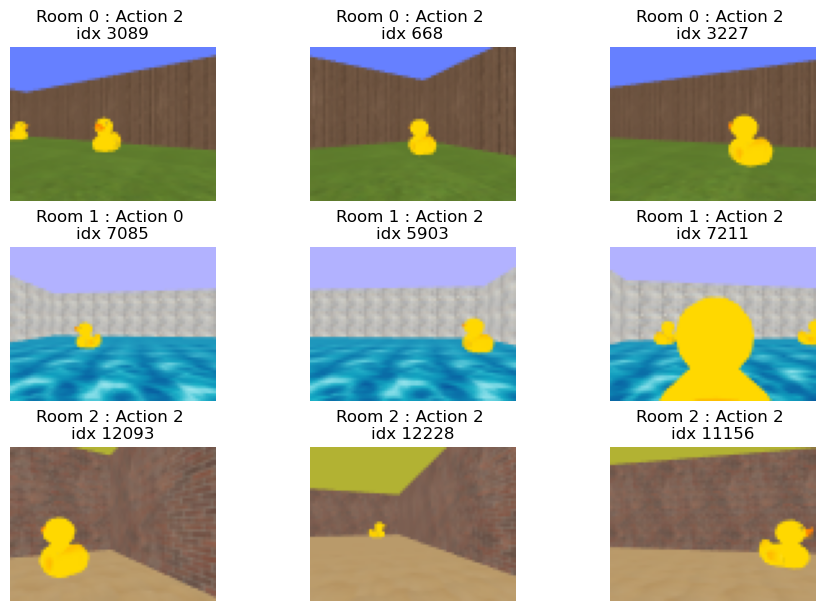

In [27]:
# unique_room list: just [0, 1, 2, 3]
unique_rooms = np.unique(room_ids)
plt.figure(figsize=(9, 6), constrained_layout=True)

for i, room in enumerate(unique_rooms):
    # all indices for this room
    indices = np.where(room_ids == room)[0]
    # pick 3 random unique indices
    rand_idx = np.random.choice(indices, size=3)

    # plot each random room, action, and index number
    for j, idx in enumerate(rand_idx):
        plt.subplot(len(unique_rooms), 3, i*3+j+1)
        plt.imshow(observations[idx])
        plt.title(f"Room {room} : Action {actions[idx]} \nidx {idx}")
        plt.axis("off")

# plt.tight_layout()
plt.show()

### Explain in words what you observe: how do the observations from the different rooms vary?

Each room appears to have the same overall layout, consisting of four main elements: ground, sky, walls, and rubber ducks. Each room is square-shaped, formed by four walls, with the ducks placed at random positions within each room (different orientation and size). However, each of these elements, besides the duck, has different textures across rooms. For example, in room 0 the walls appear to be made of wood, whereas in rooms 1 and 2, the walls resemble concrete and mud, respectively. Additionally, room 3 has its own features.

It is important to note that the duck has a constant visual yellow/orange hue throughout each room. A machine learning model or neural network should therefore focus on learning features that describe the duck itself rather than the background elements like wall or floor textures. In other words, ideally, the model should be room-invariant, recognizing the duck regardless of the room. However, this task can be challenging, since the sky in room_id two shares a similar color palette with the duck itself.

### Are the samples i.i.d.? What does that imply for splitting your data?

No, the samples are not independent and identically distributed. 

Each sample in a demonstration corresponds to an image, meaning samples, i.e. images, are temporally correlated. In other words, the next observation depends on the previous action as the human or model moves towards the duck. Therefore, the samples are not independent.

Additionally, the data is not identically distributed since observations come from different rooms. Each of these rooms has its own visual cues, i.e. different textures. Therefore, samples from one room follow a different distribution than from another room (unless you are training and testing in one room).

With this in mind, the training dataset (rooms 0, 1, and 2) should be created into a random 70/15/15 train–validation-test split. This would help monitor the performance and test our model on unseen data. Additionally, instead of splitting the images, the data should be split by demonstration (at least in theory). That is, we will keep the entire sequence of actions and observations together. This will allow the model to learn from complete trajectories. However, this would only work with an RNN. Since the assignment does not focus on supervised learning, this is not possible. Thus, as described in tasks 2 and 3, we should use a 70/15/15 sample split.

### Is there a class imbalance? If yes, what are procedures to deal with that?

In [28]:
# find the counts of each action class
unique, counts = np.unique(actions, return_counts=True)
print("Class 0 count: ", counts[0])
print("Class 1 count: ", counts[1])
print("Class 2 count: ", counts[2])

Class 0 count:  2110
Class 1 count:  432
Class 2 count:  10590


Based on the class count above, yes, there is a class imbalance. The "forward" action occurs far more often than "left" or "right". To address this, we can use class weighing — allowing the classes "left" or "right" to contribute more to the loss during training. We could also focus on over/undersampling the data during training. However, if not done correctly, this could lead to overfitting on these classes. Lastly, when evaluating the model’s performance, we will use macro-F1 scores instead of accuracy. This allows for fair class performance.

### Do we have a high risk of conflicting labels for observations? What problems can this cause?

Yes, there is a risk of conflicting labels. Since each of the demonstrations is recorded by a human, there is a chance different actions were applied to similar observations. During model training, this can be confusing, as it could receive inconsistent examples of the "correct" action given an observation. As a result, the model might take longer to train and generalize poorly.


### The data was collected from human demonstrations. What are potential issues with this way of collecting data?

As mentioned in the previous response in the cell above, human demonstrations can lead to inconsistent observation/action pairs, especially if two different humans perform the task. Additionally, each recorded human demonstration can lead to a different strategy. Both of these factors can lead to noisy or conflicting labels.

---

# 2. Prepare the Data and Evaluate Features (15 points)

In this section you should only use the ORIGINALLY provided demo files (i.e. 'demo-*-*.pickle'). You should pre-process the data, e.g., down-sample, and extract features to create your training data matrix "X".

<div class="alert alert-block alert-warning">
Remember to provide thorough insights, analysis and reasoning behind your design choices and what you see as a consequence of these choices. Try to synthesize rather than describing what you did step by step.
</div>

## 2.1. Clustering observations from different rooms (6 points)

Before we turn towards the main task of action classification (section 2.2), let us first try a small unsupervised clustering task. Pretend that we only have the observations, but did not record the room_ids of these observations. The goal is to cluster the observations into k=3 clusters such that 1 cluster (approximately) corresponds to 1 room. For this task, you can ignore the actions and room_id information.

1. Propose a feature extraction method `feat_extract_clust` which can be used to CLUSTER the samples and (approximately)<br> recover the room_ids. Motivate what you use in your feature extraction method. <span style="float: right;">(2 pt)</span>
2. Perform clustering based on the features obtained with `feat_extract_clust`, and compare the results to the true room_id<br> labels. For this you will need to select a statistical measure to compare cluster labels to room_ids. <span style="float: right;">(1 pt)</span> (Please refer to [this link](https://scikit-learn.org/stable/modules/model_evaluation.html))
3. Explain what measure you use for comparing the features and why. <span style="float: right;">(2 pt)</span>
4. Can you recover the room_ids by clustering? Motivate your answer with your results. <span style="float: right;">(1 pt)</span>

### 2.1.1 Feature extraction

Since the different rooms have distinguished textures, it can be assumed that the features will be spread out into a couple of clusters, so the variance will be preserved in a limited number of dimensions. Therefore, using projection for feature extraction is the preferred way, as the data will not have manifolds in the feature space. We will use Principal Component Analysis (PCA) in this assignment, as it is widely used, and we are most familiar with this algorithm.

In [79]:
#%%time
from sklearn.decomposition import PCA

#get the optimal number of dimensions

#reshape data

#print("original data shape: ", np.shape(observations))
#X_obs = np.reshape(observations, (-1, 60*80*3))
#print("reshaped data shape: ", np.shape(X_obs))

#aim to keep 95% of the variance

#pca_obs = PCA(n_components=0.95)
#X_red = pca_obs.fit_transform(X_obs)

#get number of components

#print(pca_obs.n_components_)
#output: 140

In [30]:
def feat_extract_clust(observs):
    #feature extraction method

    #first reshape the features from the multi dimensional array to 1 dimension for each feature
    X_obs = np.reshape(observs, (-1, 60*80*3))
    
    #then fit the pca to the previously ran parameters
    pca_obs = PCA(n_components=140)
    X_red = pca_obs.fit_transform(X_obs)
    
    return X_red

### 2.1.2 Clustering

For the clustering task, the k-means algorithm would be the best fit, as it is fast and scalable - which is perfect for this many features — and the drawback of determining the number of clusters is solved by knowledge of the number of clusters.

In [31]:
#%%time
from sklearn.cluster import KMeans

#get reduced dimensions
X_obs_red = feat_extract_clust(observations)

#3 clusters
k = 3

#predict
kmeans_obs = KMeans(n_clusters=k, n_init=10, random_state=420)
id_pred = kmeans_obs.fit_predict(X_obs_red)

C:\Users\kovac\anaconda3\envs\RO47002_FA\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kovac\anaconda3\envs\RO47002_FA\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\kovac\anaconda3\envs\RO47002_FA\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\kovac\anaconda3\envs\RO47002_FA\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\kovac\anaconda3\envs\RO47002_FA\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winap

In [32]:
from sklearn.metrics.cluster import contingency_matrix

#evaluation
con_mx = contingency_matrix(room_ids, id_pred)
print(f'Confusion mx: \n{con_mx}')

Confusion mx: 
[[4170    0  263]
 [   0 4595    1]
 [   0    0 4103]]


### Comparing measures

The comparing measure used is a contingency matrix; since it is a square matrix, it corresponds to a confusion matrix in classification. This method is great for readability and understanding; it shows all the samples that have been assigned the wrong cluster compared to the true labels. Since the true labels are available and there are only 3 room ids this measure metric is a great choice. The random_state was fixed to make the matrix diagonal; this way it looks more conventional, and it is more readable as well.

### Does clustering work for room_ids?

From the evaluation of the classification, it is clear that 2 clusters are working close to perfect (1 mistake is perfectly tolerable given the sample size), although the third cluster has some misclassified room_ids (263); compared to the true positives (4103), this is just 6.41%, and compared to all the predictions (13132), it would be almost exactly 2%. Based on this, we could use the clusters as room_ids, as it would make the correct prediction 98% of the time.

## 2.2. Features for action classification (9 points)

Now we turn to feature extraction for the main classification task, which you can reuse also in the later sections of this notebook.

1. Explain: Will you use the same extractor as in step 1; Why (not)? <span style="float: right;">(2 pt)</span>
2. Propose a feature extraction method `feat_extract` which you will use in the subsequent sections to classify *action*, rather<br> than room_ids. <span style="float: right;">(1 pt)</span>
3. Explain: Are there any important hyperparameters in your feature extractor? <span style="float: right;">(2 pt)</span>
4. Explain: How will you decide on the values for these hyperparameters? What is the trade-off if this hyperparameter is either (too)<br> low or (too) high? <span style="float: right;">(2.5 pt)</span>
5. Explain: What is the dimensionality of your feature space? <span style="float: right;">(0.5 pt)</span>
6. Apply your `feat_extract` to all observations to create the data that you will use in the subsequent sections. <span style="float: right;">(1 pt)</span>

### Will we use the same extractor as in step 1?
No, we will not use the same extractor. In step one, we applied a PCA to identify the room_id. This worked well when determining the room_id because PCA captured the global appearance and texture, which is not important for action classification. In other words, we don't want a model to choose an action based on what the room looks like. We want our model to understand where the duck is in the observation.

### Proposed feature extraction method
Our proposed feature vector is structured as follows:

```[is_duck, duck_area, duck_x, duck_y]```

- is_duck : a boolean flag (0 = no duck detected, 1 = duck detected)
- duck_area : normalized area of the detected yellow blob
- duck_x, duck_y = normalized center x/y coordinates of the yellow blob

In general, the basic steps are as follows:
1. Convert the RGB into HSV
2. Apply HSV threshold to create a mask that keeps the yellow pixels (keeping in mind yellow hue of room 2)
3. If at least one pixel detected within the range, find the largest region (i.e. blob)
4. Compute the centroid and area, normalize them
5. Return the resulting feature vector
6. If no region is found, return [0, 0, 0, 0]

In [33]:
def feat_extract(observation):
    # to HSV
    hsv = cv2.cvtColor(observation, cv2.COLOR_RGB2HSV)

    # create yellow pixel (of duck) mask
    lower = np.array([20, 80, 80], dtype=np.uint8)   # H,S,V
    upper = np.array([35, 255, 255], dtype=np.uint8)
    mask  = cv2.inRange(hsv, lower, upper)

    # if no yellow pixels, return 0
    if np.count_nonzero(mask) == 0:
        return np.array([0.0, 0.0, 0.0, 0.0])
    
    # find blobs of the yellow pixels
    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # find the biggest one
    c = max(cnts, key=cv2.contourArea)
    # create rectangle around the biggest blob and gets its dimensions
    x, y, w, h = cv2.boundingRect(c)

    # get hight and width
    H, W = mask.shape
    # area of duck normalized
    area_norm = (w*h) / (H*W)
    # calcualte the center of each t
    cx, cy = x + w/2, y + h/2

    # put together the feature fector
    feature_vector = np.array([1.0, area_norm, cx / W, cy / H])
    return feature_vector

def build_feature_matrix(X_imgs):
    return np.vstack([feat_extract(img) for img in X_imgs])

### Are there any important hyperparameters in your feature extractor?
The only true hyperparameter in our feature extractor is the HSV color range to determine which pixels are considered the duck's yellow. It is defined by lower and upper bounds for hue, saturation, and value. The lower values set the minimum color, and the upper values set the maximum.

### How will you decide on the values for these hyperparameters?
The mask thresholds can be chosen by tuning them visually using an HSV color picker and testing the results with a model. If the model does not perform well, the thresholds can be widened. If the model generalizes too much and captures a lot of background noise, they can be shrunk again. This process can be repeated. Or, a small script could allow for manual visual and manual adjustment of the values.

### What is the dimensionality of your feature space?
The dimensionality of our feature space is 4. Since this is so low, training will be fast, and the model will focus on simple patterns, since the decision boundaries are less complex. However, this approach only works if there is one blob of yellow duck pixels. Other objects similar in hue could lead the model astray.

### Observation data with feature extaction applied

In [34]:
X_feat = build_feature_matrix(observations)
print(X_feat.shape)

(13132, 4)


----

# 3. Single Room Action Classification  (35 points)
To get started, we will train and test a model that is only suitable for operating at a single room, i.e., at room_0.

As a first step split the data into a training, validation, and test set. You can use the originally provided data, or collect your own.

<div class="alert alert-block alert-warning">
Remember to provide thorough insights, analysis and reasoning behind your design choices and what you see as a consequence of these choices. Try to synthesize rather than describing what you did step by step.
</div>


## 3.1. Shortlist Promising Models (25 points)
1. Compare at least 2 models. One of them needs to be a neural network, one of them needs to be not a neural network.<span style="float: right;">(3 pt)</span>
2. For each of the models that you are going to compare, explain what are its relative advantages/disadvantages in terms of training<br> time, test time, and number of model parameters compared to the other choices. Also explain how these considerations relate to<br> the target application, and motivate which type of model would be preferred based on these considerations only (so disregarding<br> the actual quality of the models). <span style="float: right;">(10 pt)</span>
3. If needed, perform dimensionality reduction before training your selection models. Explain why it is (not) needed.<span style="float: right;">(1.5 pt)</span>
4. Roughly tune those models<span style="float: right;">(1 pt)</span>
5. Evaluate the models in terms of performance, bias, variance, etc.<span style="float: right;">(5 pt)</span>
6. Please use the macro-F1 score (see sklearn documentation) as your main criterion. Looking at confusion matrices, accuracy etc.<br> might also provide valuable insights. Why is the accuracy score potentially problematic in this setting?<span style="float: right;">(1.5 pt)</span>
7. Pick one algorithm to develop further. Motivate your choice of algorithm with your results.<span style="float: right;">(3 pt)</span>


### Task 3.1 Overview
For this task we aim to create and validate two models focused on action classification given an observation in room 0. To begin, the raw image data from room_id 0 is split into 70% training, 15% validation, and 15% test sets. The two model types will be a Random Forest (RF), a non-neural, and a Convolutional Neural Network (CNN). Models will be evaluated using the macro-F1 score, confusion matrix, and accuracy. Based on this performance, we will fine-tune the better-performing model in Task 3.2.

As the RF model is better with feature vectors, it will be trained on the dimensionally reduced data from Task 2 (now 4D). Additionally, this will simplify the learning process, ensure better generalization, and make the model faster. The CNN will be trained directly on the raw image data since it learns spatial features automatically.

In [35]:
# required imports

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from functools import partial
from sklearn.utils.class_weight import compute_class_weight
import os

### General Functions & Data Split

In [36]:
def eval_model(model, X, y, is_cnn=False):
    y_pred = model.predict(X)
    if is_cnn:
        y_pred = np.argmax(y_pred, axis=1)

    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    cm = confusion_matrix(y, y_pred);

    print("Evaluation Results:")
    print(f'Accuracy: {acc:.3f}')
    print('Confusion matrix:\n', cm)
    print(f'Macro-F1: {f1:.3f}')

In [37]:
def split_data(X, y, shuffle=False):
    # split off test data
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=0, shuffle=shuffle)

    #  split the remaining 85% into train (70%) and val (15%)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=0, shuffle=shuffle)

    print(f"Train size: {len(X_train)}, Val size: {len(X_val)}, Test size: {len(X_test)}")
    return X_train, X_val, X_test, y_train, y_val, y_test

In [38]:
room_id = 0

# find the counts of each action class
mask_room0 = room_ids == room_id
obs_room0 = observations[mask_room0]
act_room0 = actions[mask_room0]

# observation and action data for each data set (uses feature extracted data)
X_rf = X_feat[mask_room0]
y_rf = act_room0

# CNN uses full RGB image array
X_cnn = obs_room0
y_cnn = act_room0

# split the data RF
X_train_rf, X_val_rf, X_test_rf, y_train_rf, y_val_rf, y_test_rf = split_data(
    X_rf, y_rf, shuffle=True
)

# split the data CNN
X_train_cnn, X_val_cnn, X_test_cnn, y_train_cnn, y_val_cnn, y_test_cnn = split_data(X_cnn, y_cnn, shuffle=True)

Train size: 3104, Val size: 664, Test size: 665
Train size: 3104, Val size: 664, Test size: 665


In [39]:
# find the counts of each action class
unique, counts = np.unique(act_room0, return_counts=True)
print("Class 0 count (turn left): ", counts[0])
print("Class 1 count (turn right): ", counts[1])
print("Class 2 count (move forward): ", counts[2])

Class 0 count (turn left):  683
Class 1 count (turn right):  105
Class 2 count (move forward):  3645


Before continuing, it is important to note that there is a class imbalance within the room_id 0 dataset. In particular, the class action "move forward" is much more common than "turn left" or "turn right". Moving forward with training models, this imbalance can cause the models to favor the majority class ("move forward").

### Why is the accuracy score potentially problematic in this setting?
The accuracy metric is misleading because the dataset is imbalanced, as shown above. During training, a model can get a high accuracy by predicting the "forward" action most of the time while ignoring the "left" and "right" actions. Thus, it does not reflect the true model performance. The macro-F1 score is a better evaluation method for this class, as it tests this imbalance.

### Random Forest Model

The Random Forest model works well as a baseline for quick action-classification tasks, as seen in practicum four with imitation learning. Depending on the hyperparameters, it trains quickly and can handle nonlinear relationships between features. Compared to the CNN, RF has fewer parameters to train than a neural network, i.e., a few hundred trees versus thousands of weights. However, it cannot learn spatial or visual patterns directly from an image, which a CNN can do.

In [40]:
# RF Classifer
def rf_train_classifier(X_train, y_train):
    # init model
    rf_clf = RandomForestClassifier(
        random_state=0,
        n_estimators=200,
        class_weight='balanced',
    )
    # train model
    rf_clf.fit(X_train, y_train)
    
    return rf_clf

In [41]:
%%time
# train the RF classifier
rf_clf = rf_train_classifier(X_train_rf, y_train_rf)

CPU times: total: 2.03 s
Wall time: 2.04 s


In [42]:
# evalulate the validation data for tunning
eval_model(rf_clf, X_val_rf, y_val_rf)

Evaluation Results:
Accuracy: 0.873
Confusion matrix:
 [[ 66   0  45]
 [  2   0  16]
 [ 19   2 514]]
Macro-F1: 0.531


As shown above, the performance on the validation set is not very good. Per the instructions, the model was only roughly tuned based on the validation results. That is, the number of estimators was set to 200, and the class_weights parameter was set to "balanced" to account for the class imbalance. Even with this slight tuning, according to the confusion matrix and accuracy (approximately 0.9), the model still predicts most forward actions most commonly and frequently misses the left and right actions. 

### Convolutional Neural Network (CNN)

The CNN is a well-suited NN for this task because it can learn spatial patterns and visual features from the observation images, such as edges, textures, and most importantly, the duck. With that said, CNNs require more computation time and larger datasets to train well. Note: the CNN model below was heavily influenced by the sklearn example in Chapter 14 of the ML book.

In [43]:
# define a default convolution filter
DefaultConv2D = partial(
    layers.Conv2D, 
    kernel_size=3, 
    activation="relu", 
    kernel_initializer="he_normal", 
    padding="same"
)

# create simple CNN model
cnn_model = tf.keras.Sequential([
    layers.Input(shape=(60, 80, 3)),
    layers.Rescaling(1/255),
    
    DefaultConv2D(filters=32, strides=2),
    DefaultConv2D(filters=32),
    tf.keras.layers.MaxPool2D(),
    
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPool2D(),
    
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax")
])

# comple the model
cnn_model.compile(
    optimizer=keras.optimizers.Adam(1e-4), #1e-3
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 60, 80, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 40, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 40, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 20, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 10, 256)          │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 10, 256)          │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 820,003 (3.13 MB)

 Trainable params: 820,003 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
%%time
# determine class weights
classes = np.unique(y_train_cnn)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cnn)
class_weight = dict(zip(classes, weights))

history = cnn_model.fit(X_train_cnn, y_train_cnn,
    validation_data=(X_val_cnn, y_val_cnn),
    epochs=20, batch_size=256, class_weight=class_weight, verbose=0)


CPU times: total: 22min 15s
Wall time: 3min 5s


In [45]:
eval_model(cnn_model, X_val_cnn, y_val_cnn, is_cnn=True)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Evaluation Results:
Accuracy: 0.675
Confusion matrix:
 [[ 89   5  17]
 [  1  12   5]
 [ 64 124 347]]
Macro-F1: 0.530


In [46]:
# observe varaiance and bias
if show_policy:
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

As the evaluation shows above, the CNN does not perform very well. Again, per the instructions, the model was slightly tuned: a lower learning rate of 1e-4 was used for more stable loss optimization, and class weights were applied to make up for the class imbalance. With this addition, the CNN's macro-F1 score was improved. During the approximately four-minute training, the validation accuracy changed frequently while the training accuracy had a slow increase. The changing accuracy of the validation is likely due to the use of class weights and the model’s attempt to minimize loss for the minority classes.

### Comparison
To compare the performance of both models, each will be evaluated on the "test" dataset and quantitatively using the robot simulator through a policy function. This will indicate how well each model generalizes to unseen images of the same room. Testing on unseen data is important because it measures how well a model generalizes to new observations. Secondly, the simulation and test_policy will evaluate the model in real situations, giving the average success rate and the average reward (i.e. the overall performance and efficiency of the model).

In [47]:
# test data eval
print("Random Forest Test Evaluation:")
eval_model(rf_clf, X_test_rf, y_test_rf)
print("\n")
print("CNN Test Evaluation:")
eval_model(cnn_model, X_test_cnn, y_test_cnn, is_cnn=True)

Random Forest Test Evaluation:
Evaluation Results:
Accuracy: 0.887
Confusion matrix:
 [[ 43   0  39]
 [  0   0  11]
 [ 22   3 547]]
Macro-F1: 0.507


CNN Test Evaluation:
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Evaluation Results:
Accuracy: 0.692
Confusion matrix:
 [[ 64   2  16]
 [  0   8   3]
 [ 67 117 388]]
Macro-F1: 0.503


In [48]:
def RF_policy(observation):
    """
    Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    Output: action,     an integer representing the action (0 = Left, ... 2 = Forward)
    N.B.: actions is just an int, NOT a numpy array
    """
    # feature extration
    obs = feat_extract(observation)
    action = rf_clf.predict([obs])[0]
    
    return action

if show_policy:
    rs = run_simulation(RF_policy, envs[room_id], max_steps=200, delay=0.05)

In [49]:
def CNN_policy(observation):
    """
    Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    Output: action,     an integer representing the action (0 = Left, ... 2 = Forward)
    N.B.: actions is just an int, NOT a numpy array
    """
    ## expand to 4D array for the cnn_model
    obs = np.expand_dims(observation, axis=0)
    # predict with CNN
    preds = cnn_model.predict(obs, verbose=0)

    # Choose the most likely action
    action = int(np.argmax(preds[0]))

    return action

if show_policy:
    rs = run_simulation(CNN_policy, envs[room_id], max_steps=200, delay=0.05)

In [50]:
avg_sussess_rate, avg_reward = test_policy(RF_policy, envs_norender[room_id])

Run 1 / 10
Success rate: 1.0
Run 2 / 10
Success rate: 1.0
Run 3 / 10
Success rate: 1.0
Run 4 / 10
Success rate: 0.8
Run 5 / 10
Success rate: False
Run 6 / 10
Success rate: 0.8
Run 7 / 10
Success rate: 0.8
Run 8 / 10
Success rate: 1.0
Run 9 / 10
Success rate: 1.0
Run 10 / 10
Success rate: 0.8

average success rate: 0.82
average reward: 0.019477166006238285


In [51]:
avg_sussess_rate, avg_reward = test_policy(CNN_policy, envs_norender[room_id])

Run 1 / 10
Success rate: 1.0
Run 2 / 10
Success rate: 1.0
Run 3 / 10
Success rate: 0.4
Run 4 / 10
Success rate: 1.0
Run 5 / 10
Success rate: 1.0
Run 6 / 10
Success rate: 1.0
Run 7 / 10
Success rate: 0.6
Run 8 / 10
Success rate: 1.0
Run 9 / 10
Success rate: 0.6
Run 10 / 10
Success rate: 0.8

average success rate: 0.8400000000000001
average reward: 0.021480512966430883


By our observations, the RF had an average test accuracy of 0.9 and a macro-F1 score of 0.5, while the CNN had an average accuracy of 0.77 and a macro-F1 score of 0.53. At first glance, it seems as though the RF outperforms the CNN due to its higher accuracy and similar macro-F1. However, the confusion matrices show that the RF is biased toward predicting the majority class, while the CNN makes more balanced predictions across all classes. The accuracy in the CNN was decreased because the model predicted the minority classes much more often.

In the policy simulations, we observed the RF get stuck or react too late to turning. The CNN demonstrated better turning decisions when it was stuck or searching for a new duck.

Overall, even though it takes almost 10 times longer to train, the CNN model has better generalization to the real-world task and achieves a better trade-off between bias and variance. Additionally, it has many more tunable hyperparameters for the next task. The CNN model will be used in the following Task 3.2.


## 3.2. Fine-Tune the System (10 points)
1. What are the most important hyperparameters of your chosen algorithm?<span style="float: right;">(2 pt)</span>
2. Perform hyperparameter optimization (including pre-processing steps)<span style="float: right;">(2 pt)</span>
3. Compare at least 3 models with different sets of hyperparameters <span style="float: right;">(1 pt)</span>
4. Evaluate the final model (similar to "Shortlist Promising Models" above)<span style="float: right;">(5 pt)</span>

Chosen algorithm: Convolutional Neural Network

### What are the most important hyperparameters of your chosen algorithm?

1. Learning rate:
The learning rate is one of the most important hyperparameters in any machine learning model. It defines how quickly the model adapts to new data during training. If set high, the model rapidly converges but quickly forgets older data. If set low, the system will learn slower and possibly get stuck in local minima. In our case, a CNN's learning rate should be small (in the range of 1e-3 to 1e-5) because the dataset is small and imbalanced, making it sensitive to noisy samples.

2. Optimizer:
The optimizer is another key element in the model's training. It updates the model's parameters, the weights and biases, to minimize the loss function. In the CNN case, optimizers like Adam or AdamW are commonly used, as they automatically adjust learning rates for each parameter. Other optimizers, such as RMSProp, or adding L2 regularization can be used.


3. Convolutional Layers:
A CNN's architecture can vary. In general, a CNN's structure has a few convolutional layers followed by a ReLU activation, then pooling layers to extract high-level features. As the image passes through the model, its resolution decreases while the feature depth increases. The final softmax layer outputs the prediction for each observation. For our action classification task, it makes sense to use a compact model to balance performance and efficiency. It is important not to be too complex to avoid overfitting the data.

### Perform hyperparameter optimization (including pre-processing steps)
Each CNN model below has different hyperparameters. For each preprocessing step, the image pixel values are rescaled to a value between 0 and 1 for faster learning.

### Model 1
For Model 1, the CNN optimizer was changed to AdamW to include weight decay, and the learning rate was set to 3e-4 for faster convergence. Also, the batch size was reduced to 128 and the number of epochs increased to 30. The rest of the CNN structure stayed the same from the baseline.

In [52]:
# COMMENTED AS INSTRUCTED

# %%time
# # model 1
# # define a default convolution filter
# DefaultConv2D = partial(
#     layers.Conv2D, 
#     kernel_size=3, 
#     activation="relu", 
#     kernel_initializer="he_normal", 
#     padding="same"
# )

# # create simple CNN model
# cnn_model_1 = tf.keras.Sequential([
#     layers.Input(shape=(60, 80, 3)),
#     layers.Rescaling(1/255),
    
#     DefaultConv2D(filters=32, strides=2),
#     DefaultConv2D(filters=32),
#     tf.keras.layers.MaxPool2D(),
    
#     DefaultConv2D(filters=64),
#     DefaultConv2D(filters=64),
#     tf.keras.layers.MaxPool2D(),
    
#     DefaultConv2D(filters=256),
#     DefaultConv2D(filters=256),
    
#     layers.GlobalAveragePooling2D(),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
#     layers.Dropout(0.3),
#     layers.Dense(3, activation="softmax")
# ])

# # comple the model
# cnn_model_1.compile(
#     optimizer=keras.optimizers.AdamW(learning_rate=3e-4,  weight_decay=1e-4),
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )

# cnn_model_1.summary()

# # determine class weights
# classes = np.unique(y_train_cnn)
# weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cnn)
# class_weight = dict(zip(classes, weights))

# history_model_1 = cnn_model_1.fit(X_train_cnn, y_train_cnn,
#     validation_data=(X_val_cnn, y_val_cnn),
#     epochs=30, batch_size=128, class_weight=class_weight, verbose=0)

In [53]:
# COMMENTED AS INSTRUCTED

# eval_model(cnn_model_1, X_val_cnn, y_val_cnn, is_cnn=True)
# eval_model(cnn_model_1, X_test_cnn, y_test_cnn, is_cnn=True)

The results above demonstrate that the CNN model_1 showed improvement over the baseline. The accuracy increased as the macro score stayed roughly the same. The training and validation also seemed to converge smoothly. This could mean that the weight decay stabilized learning and reduced overfitting. However, it did take a longer time to train compared to the baseline.

### Model 2
Model 2 has the same learning rate, weight decay, and optimizer as model 1 - as this showed improvement. However, the structure is now simplified by removing one convolutional layer from each block, reducing the number of parameters by roughly 130k. This should make the model faster to train while hopefully keeping the same accuracy and F1 Score.

In [54]:
%%time
# UNCOMMENTED BECAUSE THIS MODEL IS USED IN TASK 4

# model 2
# define a default convolution filter
DefaultConv2D = partial(
    layers.Conv2D, 
    kernel_size=3, 
    activation="relu", 
    kernel_initializer="he_normal", 
    padding="same"
)

# create simple CNN model
cnn_model_2 = tf.keras.Sequential([
    layers.Input(shape=(60, 80, 3)),
    layers.Rescaling(1/255),
    
    DefaultConv2D(filters=32, strides=2),
    tf.keras.layers.MaxPool2D(),
    
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPool2D(),
    
    DefaultConv2D(filters=256),
    
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax")
])

# comple the model
cnn_model_2.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=3e-4,  weight_decay=1e-4), #1e-3
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_model_2.summary()

# determine class weights
classes = np.unique(y_train_cnn)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cnn)
class_weight = dict(zip(classes, weights))

history_model_2 = cnn_model_2.fit(X_train_cnn, y_train_cnn,
    validation_data=(X_val_cnn, y_val_cnn),
    epochs=30, batch_size=128, class_weight=class_weight, verbose=0)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 60, 80, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 40, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 10, 256)          │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

CPU times: total: 7min 30s
Wall time: 1min 12s


In [55]:
eval_model(cnn_model_2, X_val_cnn, y_val_cnn, is_cnn=True)
eval_model(cnn_model_2, X_test_cnn, y_test_cnn, is_cnn=True)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Evaluation Results:
Accuracy: 0.639
Confusion matrix:
 [[ 87   4  20]
 [  1  12   5]
 [ 60 150 325]]
Macro-F1: 0.512
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation Results:
Accuracy: 0.656
Confusion matrix:
 [[ 63   2  17]
 [  0   8   3]
 [ 59 148 365]]
Macro-F1: 0.492


The results above demonstrated that training time decreased significantly (about half) while also keeping the accuracy and Maco-F1 scores roughly the same. Additionally, the confusion matrix indicates improved generalization. Compared to the baseline and model 1, this could imply that the simpler structure may be less prone to overfitting.

### Model 3
Model 3 is now built upon Model 2 with two changes. The learning rate was reduced to 2e-4, and the number of filters in the middle block was increased to 96 to increase the complexity a bit more. In general, we hope that these changes will allow the model to perform a bit better while also keeping the training time low.

In [56]:
# COMMENTED AS INSTRUCTED

# %%time
# # model 3
# # define a default convolution filter
# DefaultConv2D = partial(
#     layers.Conv2D, 
#     kernel_size=3, 
#     activation="relu", 
#     kernel_initializer="he_normal", 
#     padding="same"
# )

# # create simple CNN model
# cnn_model_3 = tf.keras.Sequential([
#     layers.Input(shape=(60, 80, 3)),
#     layers.Rescaling(1/255),
    
#     DefaultConv2D(filters=32, strides=2),
#     tf.keras.layers.MaxPool2D(),
    
#     DefaultConv2D(filters=96),
#     tf.keras.layers.MaxPool2D(),
    
#     DefaultConv2D(filters=256),
    
#     layers.GlobalAveragePooling2D(),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
#     layers.Dropout(0.3),
#     layers.Dense(3, activation="softmax")
# ])

# # comple the model
# cnn_model_3.compile(
#     optimizer=keras.optimizers.AdamW(learning_rate=2e-4,  weight_decay=1e-4),
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )

# cnn_model_3.summary()

# classes = np.unique(y_train_cnn)
# weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cnn)
# weights = weights
# class_weight = {int(c): float(w) for c, w in zip(classes, weights)}

# history_model_3 = cnn_model_3.fit(X_train_cnn, y_train_cnn,
#     validation_data=(X_val_cnn, y_val_cnn),
#     epochs=30, batch_size=128, class_weight=class_weight, verbose=0)

In [57]:
# COMMENTED AS INSTRUCTED

# eval_model(cnn_model_3, X_val_cnn, y_val_cnn, is_cnn=True)
# eval_model(cnn_model_3, X_test_cnn, y_test_cnn, is_cnn=True)

### Evaluate the final model
Across the three CNN variants, performance improved from the baseline structure. The first model showed that with AdamW and weight decay, convergence was smoother and generalization improved. Next, Model 2 was smaller, reducing the training time while still keeping similar accuracy and macro-F1 score. In fact, its validation and test results were almost the same, showing better generalization to new observations. Lastly, Model 3 achieved the highest accuracy but showed no improvement in macro-F1 score. Taking into account both speed and generalization, Model 2 performed the best overall.

---

# 4. Enabling Generalization (20 points)
Now we are going to train and test a single model that is suitable for operating for all locations, i.e., a model that can generalize to  unseen locations. The idea is to take the final model you developed above as a starting point and to develop it further for generalization.

The simulator provides you access to room_id 3. However, this is to be treated as the test set, i.e., you are only allowed to test your model on it as the very final step. I.e., do not tweak your model after running that environment, you would be overfitting to the test data. Performance on room_id 3 environment will NOT influence your grade.


1. How can the 3 provided datasets be used to train a model that can generalize, and even more importantly how can they be used to<br> evaluate whether a model can generalize? (Hint: Lecture 2)<span style="float: right;">(2 pt)</span>
2. Above you designed features for action classification. Evaluate whether those features are suitable for generalization. If necessary<br> adapt the feature extraction. <span style="float: right;">(2 pt)</span>
3. Compare how well models trained just on the data from room_id 1 and models trained on data from multiple rooms generalize to<br> unseen rooms (using the approach from the first bullet, do *not* use room_id 3 for this comparison). Make sure that this is a fair<br> comparison, e.g., in terms of the amount and quality of the data.<span style="float: right;">(3 pt)</span>
4. Discuss at least 2 methods that can be employed to make your model perform better and be robust to the variations we have in this<br> scenario (methods for any step are fine: data collection, data augmentation, pre-processing, model structure, training, etc.)<span style="float: right;">(3 pt)</span>
5. Implement at least one of those methods.<span style="float: right;">(1 pt)</span>
6. Evaluate the final model (similar to "Shortlist Promising Models" above) for generalization making use only of data from room_id 0,<br> room_id 1, and room_id 2.<span style="float: right;">(5 pt)</span>
7. Test the final model on room_id 3 environment and discuss its performance.<span style="float: right;">(3 pt)</span>
8. Save the parameters of your best multi scenario model to your hard drive (use pickle for sklearn or built-in save/load for keras), you<br> will need to be able to reload your model without training in the next step. Be sure to include the saved parameters in your zip file so<br> we can evaluate your best model too, even without rerunning the notebook up to here.<span style="float: right;">(1 pt)</span>

<div class="alert alert-block alert-warning">
Remember to provide thorough insights, analysis and reasoning behind your design choices and what you see as a consequence of these choices. Try to synthesize rather than describing what you did step by step.
</div>

### How can the 3 provided datasets be used to train a model that can generalize, and even more importantly, how can they be used to evaluate whether a model can generalize?
The three provided datasets correspond to different rooms (0, 1, 2), each with unique textures. As discussed in Task 1, these variations mean a generalized model should be trained and validated on the combination of data. The data should also be randomly split into 80% for training and 20% for validation. To evaluate the generalization, room 3 will be used for testing the models. As hinted in Lecture 2, this tests the assumption that the training and testing data come from the same underlying distribution. By breaking that assumption, we can truly test the model's ability.

### Above you designed features for action classification. Evaluate whether those features are suitable for generalization. If necessary adapt the feature extraction.
For the CNN model we are continuing to generalize; the feature extraction method made in Task 2.2 isn't needed. The convolutions learn the features directly. This should help with finding the best feature to extract across rooms.

If we were to continue with the RF or train a standard NN on the feature extractor, it would have to be adapted. As of right now, it focuses on the yellow pixel color of the duck. If a room has a similar hue, the feature extraction method breaks down. To generalize, the best method would be to focus less on the color and more on the geometry.

In [58]:
# set the data
X = observations
y = actions

#  split the data 80%, 20%
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

### Compare how well models trained just on the data from room_id 0 and models trained on data from multiple rooms generalize to unseen rooms 
Having seen that model 2, from task 3, was the best-performing CNN for room_id 0, the following evaluates its generalization.

In [59]:
eval_model(cnn_model_2, X_val_all, y_val_all, is_cnn=True)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Evaluation Results:
Accuracy: 0.487
Confusion matrix:
 [[365   5  58]
 [ 33  31  16]
 [937 298 884]]
Macro-F1: 0.379


As expected, the model's performance decreased significantly when evaluated on all the rooms. Since it was trained only on room 0, it learned features specific to that environment. Thus, it is not good at generalizing the problem.

In order to generalize, model 2 is trained on all gathered room data.

In [60]:
cnn_model_2.summary()

classes = np.unique(y_train_all)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_all)
class_weight = dict(zip(classes, weights))

history_model_2 = cnn_model_2.fit(X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    epochs=30, batch_size=128, class_weight=class_weight, verbose=0)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 60, 80, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 40, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 10, 256)          │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551,243 (2.10 MB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 367,496 (1.40 MB)

In [61]:
eval_model(cnn_model_2, X_val_all, y_val_all, is_cnn=True)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Evaluation Results:
Accuracy: 0.585
Confusion matrix:
 [[ 323   17   88]
 [   4   65   11]
 [ 193  778 1148]]
Macro-F1: 0.501


Compared to the model trained only on room 0, this one performs much better with almost the same macro-F1 score and accuracy as the Task 3 model 2 results. In fact, these results demonstrate that the CNN model is a good fit for this type of task. It can detect visual features in an image and use them to generalize across different rooms. For instance, it is possible that the model first filters the edges (duck to wall, wall to ground, etc.), then combines finds these edges to form contours, and finally determine patterns that represent the duck, wall, ground, etc.

### Discuss at least 2 methods that can be employed to make your model perform better and be robust to the variations we have in this
Two regularization methods to increase generalization of a CNN model can include Batch Normalization and Dropout. Batch Normalization normalizes the activations of each layer. This stabilizes training, as each next layer roughly sees the same numerical values instead of having to adapt to changing texture or lighting values between rooms. Dropout randomly halts some neurons during training. This forces the network to rely on multiple feature paths rather than relying on just one. This, again, prevents overfitting and improves generalization.

### With changes to policy and CNN generalization
The following cell has the addition of Batch Normalization and an increase of Dropout. The previous Dropout rate of 0.3 was recommended by the machine learning textbook. Increasing it here should improve the model’s ability to generalize. 

While watching simulations of the model above, we had to alter the policy a small bit. Once in a while, the model got stuck. The model would move up to a duck and then turn left, right, left, and right forever. This can be attributed to the model being unsupervised, but there might also be a neuron focusing on the size of the duck: good for searching but bad when close to one. To address this, the policy below checks the previous action. This method of machine learning validation is used in practice a lot.

Note: the activation of "ReLU" was removed from the convolution partial as the Batch Normalization comes before the activation. 

In [62]:
# BELOW IS USED TO MAKE THE OPTIMAL MODEL

# checkpoint_path = "learned_weights/weights_cnn_all.best.keras"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create directory if it doesn’t exist
# os.makedirs(checkpoint_dir, exist_ok=True)

# # Create callback to save best model
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path,      # metric to watch
#     verbose=0
# )


In [63]:
# BELOW IS USED TO MAKE THE OPTIMAL MODEL

# %%time
# # define a default convolution filter
# DefaultConv2D = partial(
#     layers.Conv2D, 
#     kernel_size=3, 
#     kernel_initializer="he_normal", 
#     padding="same"
# )

# # create simple CNN model
# cnn_model_all = tf.keras.Sequential([
#     layers.Input(shape=(60, 80, 3)),
#     layers.Rescaling(1/255),
    
#     DefaultConv2D(filters=32, strides=2),
#     layers.BatchNormalization(),
#     layers.Activation("relu"),
#     tf.keras.layers.MaxPool2D(),
    
#     DefaultConv2D(filters=64),
#     layers.BatchNormalization(),
#     layers.Activation("relu"),
#     tf.keras.layers.MaxPool2D(),
    
#     DefaultConv2D(filters=256),
#     layers.BatchNormalization(),
#     layers.Activation("relu"),
    
#     layers.GlobalAveragePooling2D(),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
#     layers.Dropout(0.3),
#     layers.Dense(3, activation="softmax")
# ])

# # comple the model
# cnn_model_all.compile(
#     optimizer=keras.optimizers.AdamW(learning_rate=3e-4,  weight_decay=1e-4), #1e-3
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )

# cnn_model_all.summary()

# classes = np.unique(y_train_all)
# weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_all)
# class_weight = dict(zip(classes, weights))

# history_model_all = cnn_model_all.fit(X_train_all, y_train_all,
#     validation_data=(X_val_all, y_val_all),
#     epochs=30, batch_size=128, class_weight=class_weight, callbacks=[cp_callback], verbose=0)


In [64]:
# BELOW IS USED TO EVAL THE OPTIMAL MODEL

# eval_model(cnn_model_all, X_val_all, y_val_all, is_cnn=True)

### Evaluate the final model for generalization, making use only of data from room_id 0, room_id 1, and room_id 2.

The final model trained on data from room_ids 0 to 2 achieved good overall performance. Compared to the model trained on only room_id 0 in task 2, its performance is decreased by a small bit. The results indicate that the model can generalize decently well across different environments. It is important to note that the model also had validation data for training. Thus, a true test is evaluating its performance in an unseen environment, room_id 3.

### Test the final model on room_id 3 environment and discuss its performance 

In [65]:
# load the cnn_model
cnn_model_all = tf.keras.models.load_model("learned_weights/weights_cnn_all.best.keras")

In [66]:
room_id = 3

In [67]:
prev_action = -1

def CNN_policy_all(observation):
    """
    Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    Output: action,     an integer representing the action (0 = Left, ... 2 = Forward)
    N.B.: actions is just an int, NOT a numpy array
    """
    global prev_action
    ## expand to 4D array for the cnn_model
    obs = np.expand_dims(observation, axis=0)
    # predict with CNN
    preds = cnn_model_all.predict(obs, verbose=0)

    # Choose the most likely action
    action = int(np.argmax(preds[0]))

    if prev_action != -1:
        if prev_action == 0 and action == 1:
            action = 2
        elif prev_action == 1 and action == 0:
            action = 2
        
    prev_action = action
    return action

if show_policy:
    rs = run_simulation(CNN_policy_all, envs[3], max_steps=200, delay=0.05)

In [68]:
avg_sussess_rate, avg_reward = test_policy(CNN_policy_all, envs_norender[room_id])

Run 1 / 10
Success rate: 1.0
Run 2 / 10
Success rate: 1.0
Run 3 / 10
Success rate: 1.0
Run 4 / 10
Success rate: 1.0
Run 5 / 10
Success rate: 1.0
Run 6 / 10
Success rate: 1.0
Run 7 / 10
Success rate: 1.0
Run 8 / 10
Success rate: 1.0
Run 9 / 10
Success rate: 1.0
Run 10 / 10
Success rate: 0.6

average success rate: 0.96
average reward: 0.02473160341065789


The average success rate and average reward are very good. We observed an average success rate of 0.98 and a reward of 0.025.

---

# 5. Present Your Solution (5 points)
1. Summarize your main decisions and insights <span style="float: right;">(2.5 pt)</span>
2. Create a stand-alone demo. I.e., a block of cells that can be run on its own. For that you will need to load your pre-trained best<br> model you saved in the previous section and run it on room_id 3.<span style="float: right;">(2.5 pt)</span>


### Summarize your main decisions and insights
In summary, this assignment focused on imitation learning. The goal was to train a supervised classification model to learn human behavior by taking a visual observation and determining the best control action. This process was structured and iterative, starting by understanding the data, then moving to a simple feature extractor, and then towards a convolutional neural network (CNN).

After inspecting the data, one of the major decisions we made was to use a convolutional neural network instead of a classical random forest model. We found that our feature extractor was too simple and that with a CNN, this process could be better and more spatially aware. The results demonstrated a higher macro-F1 score, indicating that the CNN handled class imbalance more effectively.

While performing hyperparameter tuning, we further discovered the trade-off between the model's complexity, training efficiency, and generalization. We found that increasing the depth and filter size led to overfitting (higher training accuracy) and longer training times. To address this issue, we reduced it to three convolutional layers. Additionally, adding Dropout and Batch Normalization increased generalization. These few examples demonstrated that more model complexity does not always mean better performance, especially with limited and unbalanced data.

We also decided to lower the learning rate and use the AdamW optimizer to stabilize our learning. This smoothed the training and validation curves, particularly when class weights were added for correct imbalance. This made us realize how sensitive CNNs can be to optimization parameters and how tuning them affects model stability and convergence.

Another crucial insight was the difference between test performance and simulation performance. Even when some models had higher test accuracy, the models with a more balanced confusion matrix performed better in simulation. Again, this demonstrated that for imitation learning, focusing less on the raw accuracy score and more on the class balance and action consistency led to better "real-world" behavior.

We also discovered that a policy is critical to any machine learning model. It allows us as programmers to ensure that the predicted action is what we desire. In the end, we implemented a check for a common action mishap. Of course, with more time this could be analyzed and solved within the CNN model.

Lastly, we also realized that collecting more demonstration data would benefit the CNN model, allowing it to generalize better.

### Stand-alone demo

Provided code required for running the stand-alone demo:

In [69]:
from packaging import version

import cv2
import miniworld
import tensorflow as tf

assert version.parse(tf.__version__) == version.parse("2.19.1"), f"Expected tensorflow 2.19.1, got {tf.__version__}"
assert version.parse(cv2.__version__) == version.parse("4.10.0"), f"Expected opencv 4.10.0, got {cv2.__version__}"
assert version.parse(miniworld.__version__) == version.parse("2.1.0"), f"Expected miniworld 2.1.0, got {miniworld.__version__}"

In [70]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2 # you are allowed to use functions from cv2
import glob
import pickup_objects_ro47002
from pickup_objects_ro47002 import PickupObjects


In [71]:
# creating environments for the 4 environments with rendering
envs = []
from pickup_objects_ro47002 import PickupObjects
for n in range(4): 
    envs.append(PickupObjects(room_id=n, max_episode_time_step=1000, rendering=True))

room_id: 0
room_id: 1
room_id: 2
room_id: 3


In [72]:
# creating environments for the 4 environments without rendering
envs_norender = []

from pickup_objects_ro47002 import PickupObjects
for n in range(4): 
    envs_norender.append(PickupObjects(room_id=n,max_episode_time_step=1000, rendering=False)) 

room_id: 0
room_id: 1
room_id: 2
room_id: 3


In [73]:
# user key input handler
from pyglet.window import key
import time

# keep track if which keys have been pressed in the popup window
# (will be used later for the human control)
KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False,}

# define the set of all actions    
ACTIONS = [0, 1, 2]
ACTION_NAMES = ['turn_left', 'turn_right', 'move_forward']
NUM_ACTIONS = 3 # number of distinct actions

def run_simulation(policy, env, max_steps=500, verbose=1, record_data=False, delay=0.0, seed=-1, human_control=False):
    """ Run robot simulation
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of PickupObjects] the environment to simulate
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation
    - max_steps     # [int] the maximum number of steps N to run the simulation
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    - seed          # [int] location generation random seed - only set if >=0
    - verbose       # [int] how much texts gets printed: 0 = none, 1 = final stats, 2 = all
    - human_control # [True/False] if true the key presses will be passed on the policy
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
    """
    
    if verbose > 0:
        print(f'Starting simulation for {max_steps} steps.')
        if env.rendering:
            print('*** Press ESC key in popup window to stop the simulation! ***')
        print()

    if seed>=0:
#         env.seed(seed)
        env.reset(seed=seed)
    else:
#         env.seed(int( time.time() * 1000.0 ))
        env.reset(seed=int( time.time() * 1000.0 ))

    rewards = [] # will store the accumulated rewards
    observations = [] # will store the accumulated observations (only if record_data==True)
    actions = [] # will store the accumulated actions outputted by policy f (only if record_data==True)

    completed_steps = 0   
    
    
    try:
        # reset the simulation, and get the initial observation (robot "sensor measurement")
        obs = env.reinit(2 * max_steps, wait_for_keypress=human_control)[0]
        
        # main simulation loop
        for step in range(max_steps):
            time.sleep(delay)
               
            if env.rendering:
                env.render()
            
            # get keyboard pressed button status from environment
            KEY_PRESSED.update(env.key_pressed)

            if env.stop_simulation: break
            
                
            # ** APPLYING YOUR POLICY **
            # execute the given policy on the observation to determine the robot's action
            action = policy(obs)
            
            # sanity check: is the policy implemented correctly?
            assert (isinstance(action, (int, np.integer))) # returned action should be a builtin or numpy integer
            assert (action in ACTIONS) # action should be an integer 0, 1, 2 or 3
            
            if verbose > 1:
                print(f'step {step}: action = {ACTION_NAMES[action]}')

            if record_data:
                # only store all the observation and action pairs during the simulation
                #   if the record_data argument is set to True
                observations.append(obs)
                actions.append(action)

            # execute simulation step with the given control input
            obs, reward, environment_done, truncation, info = env.step(action)
            completed_steps += 1
            
            if verbose > 1:
                print(f'step {step}: reward = {reward}')

            # collect all rewards in a list
            rewards.append(reward)

            # exit simulation when goal is reached
            if environment_done or truncation:
                break

    finally:
        if env.rendering:

            try:
                if getattr(env, "window", None):
                    env.window.remove_handlers()
            except Exception:
                pass

            try:
                if getattr(env, "window", None):
                    env.window.close()
            finally:
                env.window = None
        
    rewards = np.array(rewards)
    total_reward = np.sum(rewards)
    
    if verbose > 0:
        print(f'total reward after {completed_steps} steps: {total_reward}')
        print(f'average reward: {total_reward/completed_steps}')
    
    if record_data:
        return rewards, np.array(observations), np.array(actions, dtype=int), truncation
    
    # by default, only return the rewards
    return rewards

In [74]:
def test_policy(policy, env, verbose=0, num_runs=10):
    """ Test a policy
    Input arguments:
    - policy        # [function] the robot's policy function
    - env           # [instance of PickupObjects] the environment to simulate
    - verbose       # [int] how much text gets printed: 0 = none, 1 = final stats, 2 = all
    - num_runs       # [int] how many configurations to evaluate
    
    Returns:
    - avg_sussess_rate  # [float] Average success rate of object picking, calculated as the number of successfully picked objects divided by the total number of objects.
    - avg_reward    # [float] average reward over the runs
    """ 
    
    avg_sussess_rate = 0.0
    avg_reward = 0.0
  
    seeds = range(0,num_runs)
    run_count = 1
    for seed in seeds:
        print('Run %i / %i' % (run_count, num_runs))
        success = False
        run_count += 1
        rs = run_simulation(
            policy,
            env,
            record_data=False,
            verbose=verbose, 
            max_steps=220, 
            delay=0.0,
            seed=seed)

        avg_reward += np.mean(rs)
        if np.sum(rs) > 0:
            success = np.sum(rs) / env.num_objs 
            avg_sussess_rate += success
            
        print('Success rate:', success)
    
    avg_sussess_rate = avg_sussess_rate / float(num_runs)
    avg_reward = avg_reward / float(num_runs)
    
    print()
    print(f'average success rate: {avg_sussess_rate}')
    print(f'average reward: {avg_reward}')
    
    return avg_sussess_rate, avg_reward

Our final model:

In [75]:
# load the cnn_model
cnn_model_all = tf.keras.models.load_model("learned_weights/weights_cnn_all.best.keras")

In [76]:
room_id = 3
prev_action = -1

In [77]:
def CNN_policy_all(observation):
    """
    Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    Output: action,     an integer representing the action (0 = Left, ... 2 = Forward)
    N.B.: actions is just an int, NOT a numpy array
    """
    global prev_action
    ## expand to 4D array for the cnn_model
    obs = np.expand_dims(observation, axis=0)
    # predict with CNN
    preds = cnn_model_all.predict(obs, verbose=0)

    # Choose the most likely action
    action = int(np.argmax(preds[0]))

    if prev_action != -1:
        if prev_action == 0 and action == 1:
            action = 2
        elif prev_action == 1 and action == 0:
            action = 2
        
    prev_action = action
    return action

In [78]:
avg_sussess_rate, avg_reward = test_policy(CNN_policy_all, envs_norender[room_id])

Run 1 / 10
Success rate: 1.0
Run 2 / 10
Success rate: 1.0
Run 3 / 10
Success rate: 1.0
Run 4 / 10
Success rate: 1.0
Run 5 / 10
Success rate: 1.0
Run 6 / 10
Success rate: 1.0
Run 7 / 10
Success rate: 1.0
Run 8 / 10
Success rate: 0.4
Run 9 / 10
Success rate: 1.0
Run 10 / 10
Success rate: 0.6

average success rate: 0.9
average reward: 0.023284970470864245
